<a href="https://colab.research.google.com/github/Avadhesh-Kumar45/Digital-Image-Processing---Lab/blob/main/AP22110011079_Exp_5_Avadhesh_Kumar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Take a grayscale image and add salt and pepper noise. Write
programs for the following operations and observe their outputs**

**a. Linear smoothing or Image averaging**

**b. Weighted averaging**

**c. Median filtering. Compare the output quality of image averaging and median filtering.**

**d. Max filtering**

**e. Min filtering**



In [ ]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
image = cv2.imread('/content/Lenna.png')

**Converting image into GrayScale image**

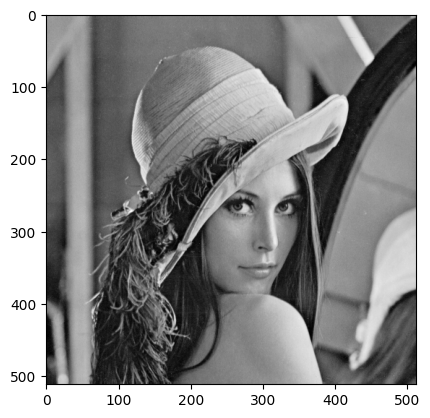

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.show()

**Adding Salt noise and Pepper noise**

In [ ]:
def add_salt_pepper_noise(image, salt_prob=0.05, pepper_prob=0.05):
    noisy_image = np.copy(image)
    total_pixels = image.size

    num_salt = int(total_pixels * salt_prob)
    for _ in range(num_salt):
        i, j = random.randint(0, image.shape[0] - 1), random.randint(0, image.shape[1] - 1)
        noisy_image[i, j] = 255

    num_pepper = int(total_pixels * pepper_prob)
    for _ in range(num_pepper):
        i, j = random.randint(0, image.shape[0] - 1), random.randint(0, image.shape[1] - 1)
        noisy_image[i, j] = 0

    return noisy_image

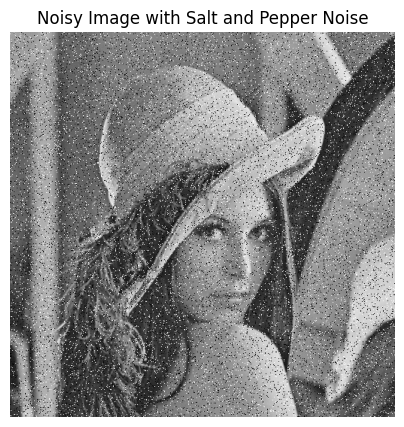

In [ ]:
noisy_image = add_salt_pepper_noise(gray_image)
plt.figure(figsize=(5, 5))
plt.imshow(noisy_image, cmap='gray')
plt.title("Noisy Image with Salt and Pepper Noise")
plt.axis('off')
plt.show()

**a. Linear smoothing or Image averaging**

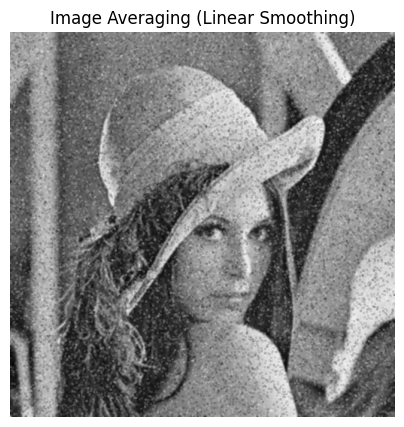

In [ ]:
avg_kernel = np.ones((3, 3), np.float32) / 9
avg_image = cv2.filter2D(noisy_image, -1, avg_kernel)
plt.figure(figsize=(5, 5))
plt.imshow(avg_image, cmap='gray')
plt.title("Image Averaging (Linear Smoothing)")
plt.axis('off')
plt.show()

**b. Weighted averaging**

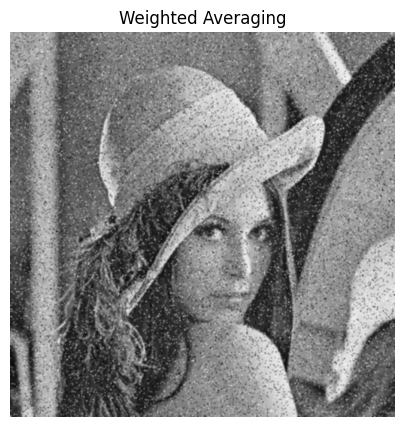

In [ ]:
weighted_kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16
weighted_avg_image = cv2.filter2D(noisy_image, -1, weighted_kernel)
plt.figure(figsize=(5, 5))
plt.imshow(weighted_avg_image, cmap='gray')
plt.title("Weighted Averaging")
plt.axis('off')
plt.show()

**c. Median filtering.**

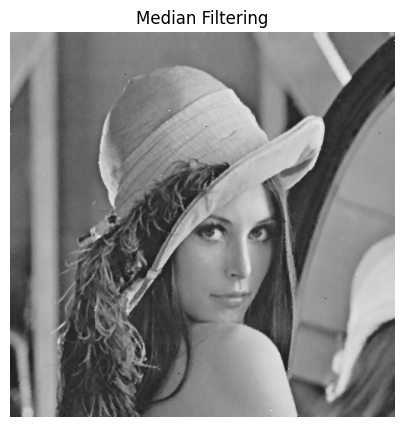

In [ ]:
median_image = cv2.medianBlur(noisy_image, 3)
plt.figure(figsize=(5, 5))
plt.imshow(median_image, cmap='gray')
plt.title("Median Filtering")
plt.axis('off')
plt.show()


**Comparing the output quality of image
averaging and median filtering.**

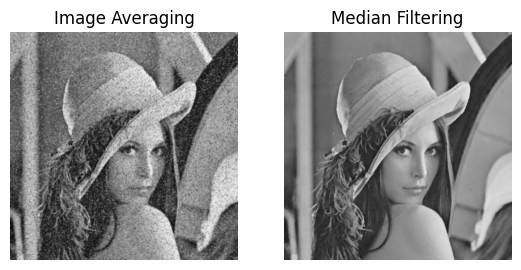

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(avg_image, cmap='gray')  # Assuming avg_image is already calculated
plt.title("Image Averaging")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(median_image, cmap='gray')
plt.title("Median Filtering")
plt.axis('off')

plt.show()

**d. Max filtering**

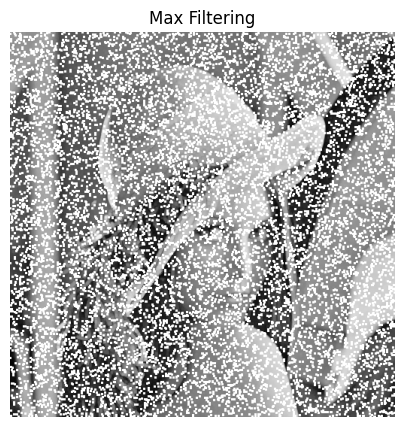

In [ ]:
max_image = cv2.dilate(noisy_image, np.ones((3, 3), np.uint8))
plt.figure(figsize=(5, 5))
plt.imshow(max_image, cmap='gray')
plt.title("Max Filtering")
plt.axis('off')
plt.show()

**e. Min filtering**

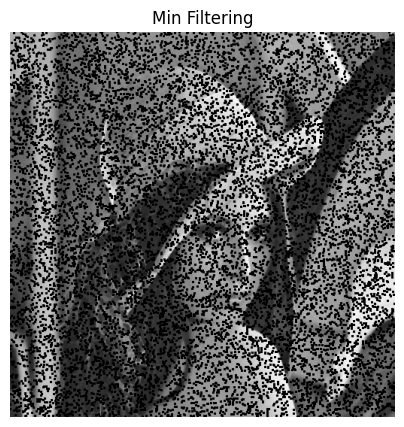

In [ ]:
min_image = cv2.erode(noisy_image, np.ones((3, 3), np.uint8))
plt.figure(figsize=(5, 5))
plt.imshow(min_image, cmap='gray')
plt.title("Min Filtering")
plt.axis('off')
plt.show()